# Research That Involves Scores From All Games

In [78]:
import numpy as np
import pandas as pd
import get_all_game_data
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

from importlib import reload
reload(get_all_game_data)

%matplotlib inline

## Investigate Home/Away Dispairity

### Read csv of all games

In [49]:
# If need to create csv use the following
get_game_data = False
all_games_csv = 'data/all_nfl_games2022_10_2.csv'

if get_game_data:
    # Create the csv
    df = get_all_game_data.get_data()
else:
    df = get_all_game_data.add_stats(pd.read_csv(all_games_csv, index_col=0))

In [50]:
games = df.copy()

## Break into seasons
#### Count games per season
Number of games by month

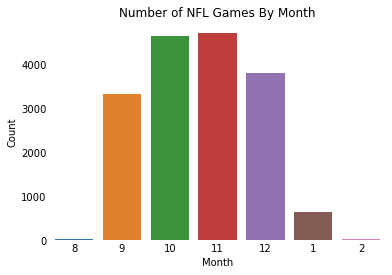

In [66]:
months = games['game_date'].dt.month.value_counts()

# plot
sns.barplot(x=months.index, y=months, order=[8,9,10,11,12,1,2])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of NFL Games By Month')
plt.box(False)
plt.tick_params(axis='both', length=0)


Number of games by year

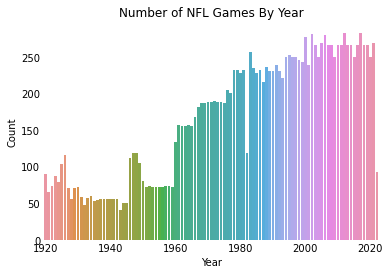

In [75]:
years = games['game_date'].dt.year.value_counts()

# plot
sns.barplot(x=years.index, y=years)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of NFL Games By Year')
plt.box(False)
plt.tick_params(axis='both', length=0)
plt.gca().set_xticks(plt.gca().get_xticks()[::20])
plt.show()

Break into seasons

In [100]:
# Get unique years to generate seasons
years = games['game_date'].dt.year.unique()
seasons = [(datetime.date(yr,8,1), datetime.date(yr+1,3,1)) for yr in years]

# Organize games by date
games_sorted = games.sort_values('game_date')
games_sorted.insert(2, 'season', np.nan)  # initialize season column

# Set season and type
for season in seasons:
    games_sorted.loc[games_sorted.game_date.dt.date.between(season[0], season[1]),'season'] = season[0].year
games_sorted['season'] = games_sorted['season'].astype('int')

# Set back to games
games = games_sorted.copy()


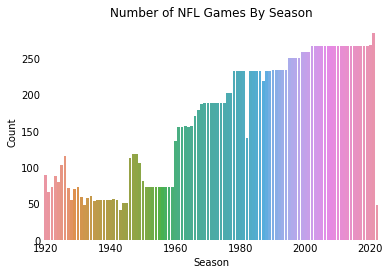

In [99]:
# Redo Year plot with season
years = games_sorted['season'].value_counts()

# plot
sns.barplot(x=years.index, y=years)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Number of NFL Games By Season')
plt.box(False)
plt.tick_params(axis='both', length=0)
plt.gca().set_xticks(plt.gca().get_xticks()[::20])
plt.show()